In [150]:
## NMOS Current Mirror Analysis for second stage of error amplifier

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from scipy.interpolate import interp1d

In [151]:
param_master = pd.read_csv("current_mirror_nmos_char_master_vd_1_25.csv")

## Assumptions
1. 1/8 CM NMOS ratio for current efficiency

In [152]:
kgm_n = np.abs(param_master['kgmn Y'])
kgds_n = np.abs(param_master['kgds_n Y'])
kcgd_n = np.abs(param_master['kcgd_n Y'])
kcgs_n = np.abs(param_master['kcgs_n Y'])
ids = np.abs(param_master['ids Y'])
I_in = np.abs(param_master['ids X'])

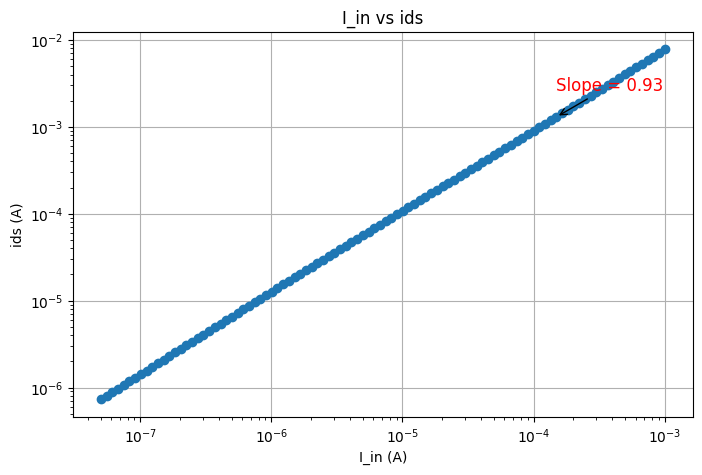

In [153]:

# Calculate the slope in log-log scale (d(ids)/d(I_in) in log space)
log_I_in = np.log10(I_in)
log_ids = np.log10(ids)
slope, intercept = np.polyfit(log_I_in, log_ids, 1)

# Annotate the slope on the plot
plt.figure(figsize=(8, 5))
plt.plot(I_in, ids, marker='o')
plt.yscale('log')
plt.xscale('log')
plt.xlabel('I_in (A)')
plt.ylabel('ids (A)')
plt.title('I_in vs ids')
plt.grid(True)
plt.annotate(f'Slope = {slope:.2f}', xy=(I_in.iloc[-20], ids.iloc[-20]), 
             xytext=(I_in.iloc[-20], ids.iloc[-20]*2),
             arrowprops=dict(facecolor='black', arrowstyle='->'),
             fontsize=12, color='red')
plt.show()

In [154]:
## Find NMOS characteristics for I_target = 70uA
I_target = 70e-6
interp_ids = interp1d(ids, I_in, kind='linear', fill_value='extrapolate')
I_in_target = float(interp_ids(I_target))
print(f"I_in for I_target = {I_target*1e6:.2f} uA: {I_in_target*1e6:.2f} uA")

I_in for I_target = 70.00 uA: 6.24 uA


In [155]:
# Find the index in I_in closest to I_in_target
idx = (np.abs(I_in - I_in_target)).idxmin()

# Extract the corresponding values
cgs_at_target = kcgs_n.iloc[idx]*ids.iloc[idx]
cgd_at_target = kcgd_n.iloc[idx]*ids.iloc[idx]
gds_at_target = kgds_n.iloc[idx]*ids.iloc[idx]

print(f"At I_in = {I_in_target:.2e} A (for I_target = {I_target:.2e} A):")
print(f"  Cgs = {cgs_at_target:.3e} F")
print(f"  Cgd = {cgd_at_target:.3e} F")
print(f"  gds = {gds_at_target:.3e} S")

At I_in = 6.24e-06 A (for I_target = 7.00e-05 A):
  Cgs = 1.180e-14 F
  Cgd = 5.150e-15 F
  gds = 2.631e-05 S


In [156]:
## From common source amplifier analysis gds requirement for Gain

Av_target = 10
gm_target = 1.26e-3
gds_nmos_amp = 0.025e-3

gds_target = gm_target / Av_target

print(f"Required gds for Av = {Av_target}: {gds_target:.3e} S")

Required gds for Av = 10: 1.260e-04 S


In [157]:
## Extracting scaling factor for current mirror NMOS

gds_target_cm = gds_target - gds_nmos_amp
print(f"gds required from current mirror NMOS: {gds_target_cm:.3e} S")

scaling_factor_nmos = gds_target_cm/gds_at_target
print(f"Scaling factor for current mirror NMOS: {scaling_factor_nmos:.2f}")

gds required from current mirror NMOS: 1.010e-04 S
Scaling factor for current mirror NMOS: 3.84


In [158]:
## Estimating the parasitic capacitances at I_target = 70uA

cgd_scaled = cgd_at_target * scaling_factor_nmos
cgs_scaled = cgs_at_target * scaling_factor_nmos
print(f"Scaled Cgd: {cgd_scaled*1e15:.2f} fF, Scaled Cgs: {cgs_scaled*1e15:.2f} fF")

Scaled Cgd: 19.77 fF, Scaled Cgs: 45.29 fF


In [159]:
## Reestimating gds requirement for Gain from V_out_DC stand point

gm_target = 18*70e-6
gds_target = gm_target / Av_target

print(f"Required gds for Av = {Av_target}: {gds_target:.3e} S")

Vout_DC = 1.25
Vdd = 1.8

gds_p = (Vout_DC/Vdd)*gds_target
gds_n = ((Vdd - Vout_DC)/Vdd)*gds_target

print(f"gds_p required: {gds_p:.3e} S, gds_n required: {gds_n:.3e} S")

gm_ro_nmos = gm_target/gds_n
print(f"gm/gds for NMOS in current mirror: {gm_ro_nmos:.2f}")


Required gds for Av = 10: 1.260e-04 S
gds_p required: 8.750e-05 S, gds_n required: 3.850e-05 S
gm/gds for NMOS in current mirror: 32.73


In [160]:
## Estimating current mirror parameters for error amplifier stage 1

I_target = 10.6e-6 * 2 * 2 #diff amp stage 1 current mirrored to single ended stage
interp_ids = interp1d(ids, I_in, kind='linear', fill_value='extrapolate')
I_in_target = float(interp_ids(I_target))
print(f"I_in for I_target = {I_target*1e6:.2f} uA: {I_in_target*1e6:.2f} uA")

I_in for I_target = 42.40 uA: 3.63 uA


In [161]:
# Find the index in I_in closest to I_in_target
idx = (np.abs(I_in - I_in_target)).idxmin()

# Extract the corresponding values
cgs_at_target = kcgs_n.iloc[idx]*ids.iloc[idx]
cgd_at_target = kcgd_n.iloc[idx]*ids.iloc[idx]
gds_at_target = kgds_n.iloc[idx]*ids.iloc[idx]

print(f"At I_in = {I_in_target:.2e} A (for I_target = {I_target:.2e} A):")
print(f"  Cgs = {cgs_at_target:.3e} F")
print(f"  Cgd = {cgd_at_target:.3e} F")
print(f"  gds = {gds_at_target:.3e} S")

At I_in = 3.63e-06 A (for I_target = 4.24e-05 A):
  Cgs = 1.088e-14 F
  Cgd = 5.137e-15 F
  gds = 1.782e-05 S


In [162]:
## Estimating gds_cm requirements from diff amp to single ended amp analysis
Vout_DC = 1.3
Vdd = 1.8

gds_n = 0.006e-3
gds_p = 0.004e-3

r_pmos = 1/(gds_p)
r_nmos = 1/(gds_n)

r_x = (Vout_DC / (Vdd - Vout_DC)) * r_pmos
r_cm_nmos_diff = r_x - r_nmos
r_cm_nmos = r_cm_nmos_diff / 2 # two current mirror NMOS in parallel
gds_cm = 1/r_cm_nmos

print(f"gds_cm required: {gds_cm:.3e} S")   

M_scaling_factor_nmos = gds_cm/gds_at_target
print(f"Scaling factor for current mirror NMOS: {M_scaling_factor_nmos:.2f}")

gds_cm required: 4.138e-06 S
Scaling factor for current mirror NMOS: 0.23


In [163]:
## Resizing pmos for meeting current target

ids_target = I_target
r_pmos_target = Vout_DC / ids_target
gds_p_target = 1/r_pmos_target
print(f"Resized PMOS to meet I_target = {I_target*1e6:.2f} uA: r_pmos = {r_pmos_target:.2e} Ohm, gds_p = {gds_p_target:.3e} S")

M_scaled_pmos = gds_p_target/gds_p
print(f"Scaling factor for PMOS load for amplifier: {M_scaled_pmos:.2f}")

Resized PMOS to meet I_target = 42.40 uA: r_pmos = 3.07e+04 Ohm, gds_p = 3.262e-05 S
Scaling factor for PMOS load for amplifier: 8.15


In [164]:
## Remeasuring the current mirror NMOS parameters with VD = 0.5V for better estimate for Diff to Single Ended stage
param_master = pd.read_csv("current_mirror_nmos_char_master_vd_0_5.csv")

In [165]:
kgm_n = np.abs(param_master['kgmn Y'])
kgds_n = np.abs(param_master['kgds_n Y'])
kcgd_n = np.abs(param_master['kcgd_n Y'])
kcgs_n = np.abs(param_master['kcgs_n Y'])
ids = np.abs(param_master['ids Y'])
I_in = np.abs(param_master['ids X'])

In [166]:
## Estimating current mirror parameters for error amplifier stage 1

I_target = 10.6e-6 * 2 * 2 #diff amp stage 1 current mirrored to single ended stage
interp_ids = interp1d(ids, I_in, kind='linear', fill_value='extrapolate')
I_in_target = float(interp_ids(I_target))
print(f"I_in for I_target = {I_target*1e6:.2f} uA: {I_in_target*1e6:.2f} uA")

I_in for I_target = 42.40 uA: 5.29 uA


In [167]:
# Find the index in I_in closest to I_in_target
idx = (np.abs(I_in - I_in_target)).idxmin()

# Extract the corresponding values
cgs_at_target = kcgs_n.iloc[idx]*ids.iloc[idx]
cgd_at_target = kcgd_n.iloc[idx]*ids.iloc[idx]
gds_at_target = kgds_n.iloc[idx]*ids.iloc[idx]

print(f"At I_in = {I_in_target:.2e} A (for I_target = {I_target:.2e} A):")
print(f"  Cgs = {cgs_at_target:.3e} F")
print(f"  Cgd = {cgd_at_target:.3e} F")
print(f"  gds = {gds_at_target:.3e} S")

At I_in = 5.29e-06 A (for I_target = 4.24e-05 A):
  Cgs = 1.122e-14 F
  Cgd = 6.086e-15 F
  gds = 2.594e-05 S


In [168]:
## Estimating gds_cm requirements from diff amp to single ended amp analysis
Vout_DC = 1.3
Vdd = 1.8

gds_n = 0.006e-3
gds_p = 0.004e-3

r_pmos = 1/(gds_p)
r_nmos = 1/(gds_n)

r_x = (Vout_DC / (Vdd - Vout_DC)) * r_pmos
r_cm_nmos_diff = r_x - r_nmos
r_cm_nmos = r_cm_nmos_diff / 2 # two current mirror NMOS in parallel
gds_cm = 1/r_cm_nmos

print(f"gds_cm required: {gds_cm:.3e} S")   

M_scaling_factor_nmos = gds_cm/gds_at_target
print(f"Scaling factor for current mirror NMOS: {M_scaling_factor_nmos:.2f}")

gds_cm required: 4.138e-06 S
Scaling factor for current mirror NMOS: 0.16


In [171]:
## Resizing pmos for meeting current target

ids_target = I_target*0.5
r_pmos_target = Vout_DC / ids_target
gds_p_target = 1/r_pmos_target
print(f"Resized PMOS to meet I_target = {I_target*1e6:.2f} uA: r_pmos = {r_pmos_target:.2e} Ohm, gds_p = {gds_p_target:.3e} S")

M_scaled_pmos = gds_p_target/gds_p
print(f"Scaling factor for PMOS load for amplifier: {M_scaled_pmos:.2f}")

Resized PMOS to meet I_target = 42.40 uA: r_pmos = 6.13e+04 Ohm, gds_p = 1.631e-05 S
Scaling factor for PMOS load for amplifier: 4.08
